open boundary spin 1/2 1-D Heisenberg model

$H = J \sum_i [S_i^z S_{i+1}^z + \frac{1}{2}(S_i^+ S_{i+1}^- + S_i^- S_{i+1}^+)]$

exact result (Bethe Anstatz):

L	     E/J

16	-6.9117371455749

24	-10.4537857604096

32	-13.9973156182243

48	-21.0859563143863

64	-28.1754248597421


In [7]:
from renormalizer.mps import Mps, Mpo, solver
from renormalizer.model import MolList2, ModelTranslator
from renormalizer.utils import basis as ba
from renormalizer.utils import Op
import numpy as np

# define the # of spins
nspin = 16

# define the model
# sigma^+ = S^+
# sigma^- = S^-
# 1/2 sigma^x,y,z = S^x,y,z

model = dict()
for ispin in range(nspin-1):
    model[(f"e_{ispin}", f"e_{ispin+1}")] = [(Op("sigma_z",0),
            Op("sigma_z",0), 1.0/4), (Op("sigma_+",0), Op("sigma_-",0), 1.0/2),
            (Op("sigma_-",0), Op("sigma_+", 0), 1.0/2)]

# set the spin order and local basis
order = {}
basis = []
for ispin in range(nspin):
    order[f"e_{ispin}"] = ispin
    basis.append(ba.BasisHalfSpin(sigmaqn=[0,0]))

# construct MPO
mol_list2 = MolList2(order, basis, model, ModelTranslator.general_model)
mpo = Mpo(mol_list2)
print(f"mpo_bond_dims:{mpo.bond_dims}")

# set the sweep paramter
M=30
procedure = [[M, 0.2], [M, 0], [M, 0], [M,0], [M,0]]

# initialize a random MPS
qntot = 0
mps = Mps.random(mol_list2, qntot, M)

mps.optimize_config.procedure = procedure
mps.optimize_config.method = "2site"

# optimize MPS
energies = solver.optimize_mps_dmrg(mps.copy(), mpo)
print("gs energy:", energies.min())


2020-04-15 22:42:12,231[DEBUG] # of operator terms: 45
2020-04-15 22:42:12,232[DEBUG] symbolic mpo algorithm: Hopcroft-Karp
2020-04-15 22:42:12,285[DEBUG] mmax, percent: 30, 0.2
2020-04-15 22:42:12,290[DEBUG] energy: -0.1085174478945915
2020-04-15 22:42:12,290[DEBUG] current size: 151.2KiB, Matrix product bond dim:[1, 2, 4, 8, 16, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 1]


mpo_bond_dims:[1, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 1]


2020-04-15 22:42:12,617[DEBUG] mmax, percent: 30, 0
2020-04-15 22:42:12,621[DEBUG] energy: -6.911737142404165
2020-04-15 22:42:12,621[DEBUG] current size: 151.2KiB, Matrix product bond dim:[1, 2, 4, 8, 16, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 1]
2020-04-15 22:42:12,691[DEBUG] mmax, percent: 30, 0
2020-04-15 22:42:12,695[DEBUG] energy: -6.91173714240646
2020-04-15 22:42:12,696[DEBUG] current size: 151.2KiB, Matrix product bond dim:[1, 2, 4, 8, 16, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 1]
2020-04-15 22:42:12,766[DEBUG] mmax, percent: 30, 0
2020-04-15 22:42:12,770[DEBUG] energy: -6.911737142406941
2020-04-15 22:42:12,771[DEBUG] current size: 151.2KiB, Matrix product bond dim:[1, 2, 4, 8, 16, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 1]
2020-04-15 22:42:12,852[DEBUG] mmax, percent: 30, 0
2020-04-15 22:42:12,855[DEBUG] energy: -6.911737142406177
2020-04-15 22:42:12,856[DEBUG] current size: 151.2KiB, Matrix product bond dim:[1, 2, 4, 8, 16, 30, 30, 30, 30, 30, 30, 30, 30, 30, 

gs energy: -6.911737143784083


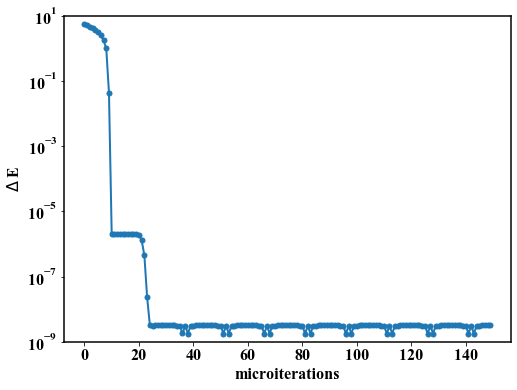

In [8]:
# plot the microiterations vs energy error
import matplotlib.pyplot as plt
import logging 

mpl_logger = logging.getLogger('matplotlib') 
mpl_logger.setLevel(logging.WARNING) 

plt.rc('font', family='Times New Roman', size=16)
plt.rc('axes', linewidth=1.5)
plt.rcParams['lines.linewidth'] = 2
std = -6.9117371455749
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(np.arange(len(energies)), np.array(energies)-std,"o-",ms=5)

plt.yscale('log')
plt.xlabel("microiterations")
plt.ylabel("$\Delta$ E")
plt.ylim(1e-9, 10)
plt.show()